In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [17]:
#load the csv file
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [18]:
# Display the first 5 rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
# Display column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# Provide summary statistics of the DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Is there any missing data? Deal with them accordingly.

In [22]:
# Check for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Using the ‘date_added’ column a new column called ‘year_added’ that only has the year the title was added.

In [23]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extract the year from 'date_added' and assign it to 'year_added'
df['year_added'] = df['date_added'].dt.year.fillna(-1).astype(int)

In [24]:
# Display the first few rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


# Using the ‘date_added’ column a new column called ‘month_added’ that only has the month the title was added.

In [25]:
df['month_added'] = df['date_added'].dt.month.fillna(-1).astype(int)

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


# Check the data types. Anything look odd? Adjust accordingly.

In [27]:
# Print the data types of the columns
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int64
month_added              int64
dtype: object

In [28]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Adjust categorical data types if needed
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

# Print the updated DataFrame with data types
print(df.dtypes)

show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
description             object
year_added               int64
month_added              int64
dtype: object


# What is the most popular release year for movies on Netflix?

In [29]:
# Filter for movies only
movies_df = df[df['type'] == 'Movie']  

# Find the most popular release year for movies on Netflix
popular_year = movies_df['release_year'].value_counts().idxmax()

print("The most popular release year for movies on Netflix is:", popular_year)

The most popular release year for movies on Netflix is: 2017


# What year did Netflix add the most content to its platform?

In [30]:
content_count = df['year_added'].value_counts()
most_content_year = content_count.idxmax()

print("The year when Netflix added the most content to its platform is:", most_content_year)

The year when Netflix added the most content to its platform is: 2019


# What is the movie with the longest title in the dataset?

In [31]:
# Find the movie with the longest title in the dataset
longest_title_movie = df[df['type'] == 'Movie']['title'].str.len().idxmax()
longest_title = df.loc[longest_title_movie, 'title']

print("The movie with the longest title in the dataset is:", longest_title)

The movie with the longest title in the dataset is: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton


# What are the top 5 most popular movie genres?

In [32]:
movies_df = df[df['type'] == 'Movie']  # Filter for movies only

# Count the occurrences of each genre
genre_counts = movies_df['listed_in'].str.split(', ').explode().value_counts()

# Retrieve the top 5 genres
top_5_genres = genre_counts.head(5)

print("Top 5 most popular movie genres:")
print(top_5_genres)

Top 5 most popular movie genres:
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: listed_in, dtype: int64


# Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.

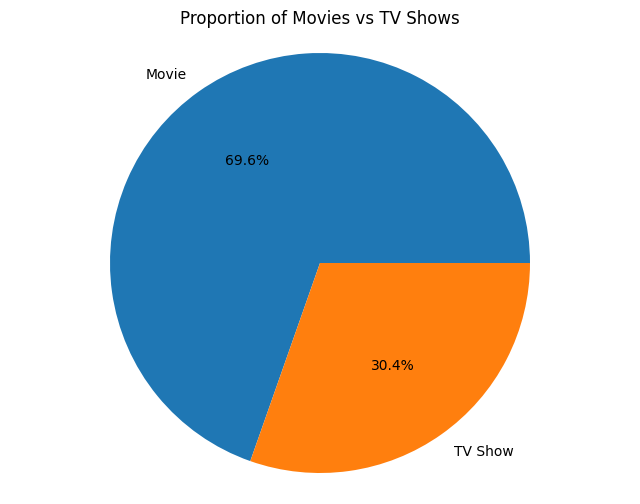

In [33]:
type_counts = df['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Movies vs TV Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Create a dashboard to summarize your insights.

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the dataset loaded into a DataFrame called 'df'

# Prepare data for visualizations
type_counts = df['type'].value_counts()
movies_percent = (type_counts['Movie'] / type_counts.sum()) * 100
tv_shows_percent = (type_counts['TV Show'] / type_counts.sum()) * 100

# Create the bar chart for movie vs TV show proportion
bar_chart = go.Bar(x=['Movies', 'TV Shows'], y=[movies_percent, tv_shows_percent],
                   marker=dict(color='dodgerblue'))

# Calculate percentage values
movies_percent_str = f"{movies_percent:.2f}%"
tv_shows_percent_str = f"{tv_shows_percent:.2f}%"

# Create text labels for the bar chart
labels = [movies_percent_str, tv_shows_percent_str]

# Create the bar chart with text annotations
bar_chart_with_text = go.Bar(x=['Movies', 'TV Shows'], y=[movies_percent, tv_shows_percent],
                             marker=dict(color='dodgerblue'),
                             text=labels,
                             textposition='auto')

# Create the bar chart for top 5 movie genres
movies_df = df[df['type'] == 'Movie']
top_5_genres = movies_df['listed_in'].str.split(', ').explode().value_counts().head(5)
bar_chart_genres = go.Bar(x=top_5_genres.index, y=top_5_genres.values,
                          marker=dict(color='dodgerblue'))

# Create the line chart for content addition over years
content_addition_counts = df['year_added'].value_counts().sort_index()
line_chart = go.Scatter(x=content_addition_counts.index, y=content_addition_counts.values,
                        mode='lines+markers', name='Content Addition',
                        marker=dict(color='dodgerblue'))

# Create the stacked bar chart for top 5 movie genres
stacked_bar_chart_genres = go.Bar(x=top_5_genres.index, y=top_5_genres.values,
                                 marker=dict(color=['dodgerblue'] * len(top_5_genres)))

# Create the subplots for the dashboard
fig = make_subplots(rows=2, cols=2, subplot_titles=('Proportion of Movies vs TV Shows',
                                                    'Top 5 Movie Genres',
                                                    'Content Addition over Years'))

# Add the visualizations to the subplots
fig.add_trace(bar_chart_with_text, row=1, col=1)
fig.add_trace(bar_chart_genres, row=1, col=2)
fig.add_trace(line_chart, row=2, col=1)

# Add the stacked bar chart to the dashboard using add_trace
fig.add_trace(stacked_bar_chart_genres, row=2, col=2)

# Update layout for responsiveness
fig.update_layout(height=600, width=900, showlegend=False)

# Display the dashboard
fig.show()